In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
import pyreadstat
from statsmodels.formula.api import ols
import linearmodels as lm
from linearmodels import PanelOLSs
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [421]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.express.colors as pxcolors
import textwrap

In [422]:
import plotly.io as pio
from IPython.display import Markdown
width = 1000
pio.renderers.default = "plotly_mimetype+notebook_connected"

In [423]:
#pip install streamlit
import streamlit as st

In [424]:
from stargazer.stargazer import Stargazer,LineLocation

In [6]:
#conda install -c msys2 posix

In [7]:
#pip install pyreadstat==1.1.3

# Overview 

As of January 2014, adults with incomes up to 138% of the Federal Poverty Level
($17,774 for an individual in 2021) became eligible for Medicaid benefits under the
Affordable Care Act’s (ACA) Medicaid expansion program. All but 12 states have
adopted the Medicaid expansion decision in their state.

In investigating the causal relationship between Medicaid expansion and discharge status in treatment programs for substance use disorder, the **Differences -in- Differences Model** was used to measure the differential effect of Medicaid expansion on the treatment group (states that adopted the Medicaid expansion) relative to the control group (states that didn’t adopt the Medicaid Expansion). 

In this analysis,successful treatment completions were used as the primary metric and data was aggregated at a state-level. The significance of other variables like gender, payment source and educational level was also explored. 

##  Econometric Methodology 

**Difference -in- Differences Model (DiD)** estimates the treatment effects of an intervention (like a policy change like the Medicaid Expansion) by comparing the differences in observed outcomes between treatment and control groups, across pre-treatment and post-treatment periods. In this analysis, the treatment group would be the states that adopted the expansion while the control group would be the states that deferred from implementing the expansion. Also, the pre-treatment period are the years between 2009 and 2013 while the post-treatment period are the years from 2014 to 2019.

The validity of the results of our DiD model is dependent on proving the Parallel Trend assumption. This assumption uses the control group as a proxy for the counterfactual trend. Specifically, if both the treatment and control groups had parallel trends for a certain outcome and a drastic deviation from the treatment group occurs during the treatment period, then this change can be attributed to the differential effect of the intervention.
<p>     
**Below is the functional form for the Difference -in- Differences Model (DiD) Model**

In [202]:
%%latex
\begin{align}
\newline\beta_{0} = The\ mean\ value\ of\ the\ response\ variable\ when\ all\ of\ the\ predictor\ variables\ in\ the\ model\ are\ equal\ to\ zero
\newline \beta_{1}Treat = Dummy\ variable\ that\ is\ equal\ to\ 1\ for\ states\ that\ adopted\ the\ expansion
\newline \beta_{2}Post = Dummy\ variable\ that\ is\ equal\ to\ 1\ for\ the\ years\ during\ the\ treatment\ period\ (2014\ and\ onwards)
\newline \beta_{3}(Treat*Post)= Interaction\ variable\ that\ represent\ the\ states\ that\ implemented\ the\ expansion\ during\ the\ treatment\ period
\end{align}

<IPython.core.display.Latex object>

**Two-way Fixed Effects Model** <p> 
If the Parallel Trend Assumption cannot be observed clearly, then there must be unobserved factors that are correlated with both treatment status and timing of the treatment. These unobserved heterogeneity or time invariant yet subject specific variation across the states and PiRs are factors that the Fixed-Effects Model accounts for by assuming that the independent variables are constant. Therefore, only the dependent variable changes in response to independent variables.
<p> 
Since, the Parallel Trend Assumption cannot be clearly demonstrated in this dataset, the Two Way Fixed Effects was used as a secondary model.**Below is the functional form for the Two-way Fixed Effects Model**

In [260]:
%%latex
\begin{align}
y_{it} = \alpha + \beta * Treat_{it} + \gamma_t + \delta_i + \lambda_{it} + \epsilon_{it} \newline
y_{it} = Treatment\ outome\ for\ a\ given\ state\ in\ a\ given\ year \newline
\alpha = The\ mean\ value\ of\ the\ response\ variable\ \newline
when\ all\ of\ the\ predictor\ variables\ in\ the\ model\ are\ equal\ to\ zero \newline
\beta * Treat_{it} = Implementation\ status\ for\ a\ given\ state\ in\ a\ given\ year \newline
\gamma_t = Time\ invarient\ variables\ eg. sex, race \newline
\delta_i= entity\ effects\ \newline
\lambda_{it}= Other\ covariates\ for\ each\ state \newline
\epsilon_{it} = error\ term 
\end{align}

<IPython.core.display.Latex object>

The variable of interest in the Difference-in-Differences Model is the "DID" or the interaction variable while the "Treat" variable is the focal point of the Two-way fixed effects model.Since we are not focused on the predictive power of these models, the R^2 value is not important but instead we assess the F statistic of the model to assess the overall validity of the model. The F-statistic provides us with a way for globally testing if ANY of the independent variables X1, X2, X3, X4… is related to the outcome Y. Generally speaking, an F-statistic of > 10 would be enough to say that at least 1 indpendent variable has a significant relationship with the y variable. 

## Dataset 

TEDS-D dataset tracks the annual discharges (TEDS-D) from substance use treatment
facilities. Publications between 2009 and 2019 were converged to create a master
dataset containing 17 million entries and 62 features. This initial dataset was reduced to dataset with around **7 million entries** and **41 columns**. These preprocessing methods are discussed in detail in the Data Wrangling section. 

**Excluded Data** Five states were dropped due to inconsistent data submissions between 2009 and 2019. These states included Virginia, Oregon, Georgia, South Carolina and Washington. 

# Data Wrangling 

## Individual Datasets 

We use 6 different files to create a dataset spanning the years 2009 to 2019.

In [110]:
tdd_06_14= pd.read_spss("C:/Users/16502/Documents/Capstone/ted-d/teds_d/teds_d_2006_2014.sav")

In [111]:
tdd_06_14["DISYR"].unique()


array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.])

**Remove years we don't need.** 

In [10]:
tdd_06_14 = tdd_06_14[tdd_06_14.DISYR != 2006.0 ]

In [11]:
tdd_06_14 = tdd_06_14[tdd_06_14.DISYR != 2007.0 ]

**Rename this df to indicate the years that this df will contain**

In [12]:
tdd_09_14 = tdd_06_14[tdd_06_14.DISYR != 2008.0]

**The df "tdd_09_14" should now only contain years between 2009 to 2014** 

In [13]:
tdd_09_14["DISYR"].unique()

array([2009., 2010., 2011., 2012., 2013., 2014.])

**Upload the rest of the datasets to cover the span of 2015 to 2019**

In [14]:
tdd_15= pd.read_spss("C:/Users/16502/Documents/Capstone/ted-d/teds_d/tedsd_2015_puf.sav")

In [15]:
tdd_16= pd.read_spss("C:/Users/16502/Documents/Capstone/ted-d/teds_d/tedsd_2016_puf.sav")

In [16]:
tdd_17= pd.read_spss("C:/Users/16502/Documents/Capstone/ted-d/teds_d/tedsd_puf_2017.sav")

In [17]:
tdd_18= pd.read_spss("C:/Users/16502/Documents/Capstone/ted-d/teds_d/tedsd_puf_2018.sav")

In [18]:
tdd_19= pd.read_spss("C:/Users/16502/Documents/Capstone/ted-d/teds_d/tedsd_puf_2019.sav")

### Feature Selection 

From checking the corresponding manual for each year's publication,  we learned that the feature called "SERVSETD" from the 2008-2014 publications had been changed to "SERVICES_D" in the subsequent publications. Below, we renamed this column to match the new publications.  

In [19]:
#rename SERVSETD to SERVICES_D 
tdd_09_14 = tdd_09_14.rename(columns={'SERVSETD': 'SERVICES_D'})

The df.unique() function can note the unique states in the 2004-2014 set but it cannot gurantee that each state submitted data for each year. Hence, we subset the tdd_09_14 by year, generate new lists of unique states in each year's submission and use sets to do comparison. 

In [112]:
df_09 = tdd_09_14[tdd_09_14["DISYR"] == 2009] 
df_10 = tdd_09_14[tdd_09_14["DISYR"] == 2010] 
df_11 = tdd_09_14[tdd_09_14["DISYR"] == 2011] 
df_12 = tdd_09_14[tdd_09_14["DISYR"] == 2012] 
df_13 = tdd_09_14[tdd_09_14["DISYR"] == 2013] 
df_14 = tdd_09_14[tdd_09_14["DISYR"] == 2014] 

#### Selected Features 

**The features that are the most relevant to our analysis are listed below.**

In [117]:
min_cols = ['CASEID',
  'STFIPS',
 'DISYR',
 'AGE',
 'GENDER',
 'RACE',
 'ETHNIC',
 'EDUC',
 'EMPLOY',
 'DETNLF',
 'PREG',
 'VET',
 'LIVARAG',
 'PRIMINC',
 'SERVICES_D',
 'METHUSE',
 'DAYWAIT',
 'REASON',
 'LOS',
 'PSOURCE',
 'NOPRIOR',
 'SUB1',
 'DSMCRIT',
 'PSYPROB',
 'PRIMPAY']

In [22]:
len(min_cols)

25

##### Using Sets to Determine States with Consistent Submission from 2009 to 2019 

New lists containing the unique states in each dataframe per year were generated. 

In [114]:
y09=df_09.STFIPS.unique().tolist()
y10=df_10.STFIPS.unique().tolist()
y11=df_11.STFIPS.unique().tolist()
y12=df_12.STFIPS.unique().tolist()
y13=df_13.STFIPS.unique().tolist()
y14=df_14.STFIPS.unique().tolist()
y15=tdd_15.STFIPS.unique().tolist()
y16=tdd_16.STFIPS.unique().tolist()
y17=tdd_17.STFIPS.unique().tolist()
y18=tdd_18.STFIPS.unique().tolist()
y19=tdd_19.STFIPS.unique().tolist()


Set "m1" contains states that are both in the 2009 and 2010 publications.The same process will be repeated to check the states with consistent submissions in subsequent publications. 

In [24]:
m1=set(y09).intersection(y10)
m2= set(m1).intersection(y11)
m3= set(m2).intersection(y12)
m4= set(m3).intersection(y13)
m5= set(m4).intersection(y14)
a=set(m5).intersection(y15)
b = set(a).intersection(y16)
c= set(b).intersection(y17)
d= set(c).intersection(y18)
state_set= set(d).intersection(y19)

In [25]:
len(state_set)

40

Set "state_set" is the set of STFIPS or states that exist in all of the dataframes, or the states that consistently provided info from 2009 - 2019. There are 40 of these states.

In [26]:
 len(state_set)

40

In [27]:
#%store state_set

#### Creating the Preliminary Dataset

We concatenated the dfs with just the features we want and then called this "causal_set1".

In [28]:
frames_d = [tdd_09_14,tdd_15,tdd_16,tdd_17,tdd_18,tdd_19]

In [29]:
causal_set1 = pd.concat(frames_d)

In [118]:
causal_set1 = causal_set1[causal_set1.columns.intersection(min_cols)]

**Double check the years spanned in the causal_set1.**

In [119]:
causal_set1.DISYR.unique()

array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019.])

In [120]:
causal_set1.head()

,CASEID,DISYR,AGE,GENDER,RACE,ETHNIC,EDUC,EMPLOY,DETNLF,PREG,...,METHUSE,DAYWAIT,REASON,LOS,PSOURCE,NOPRIOR,SUB1,DSMCRIT,PSYPROB,PRIMPAY
4793780,2.009000e+10,2009.0,6.0,1.0,4.0,5.0,2.0,3.0,-9.0,-9.0,...,2.0,-9.0,4.0,33.0,7.0,5.0,4.0,-9.0,2.0,8.0
4793781,2.009000e+10,2009.0,3.0,1.0,4.0,5.0,2.0,4.0,2.0,-9.0,...,2.0,0.0,2.0,21.0,7.0,1.0,2.0,9.0,1.0,4.0
4793782,2.009000e+10,2009.0,2.0,2.0,5.0,5.0,2.0,4.0,-9.0,2.0,...,2.0,6.0,4.0,33.0,4.0,1.0,4.0,7.0,2.0,-9.0
4793783,2.009000e+10,2009.0,2.0,2.0,5.0,5.0,1.0,4.0,2.0,2.0,...,2.0,-9.0,1.0,34.0,7.0,0.0,2.0,-9.0,1.0,4.0
4793784,2.009000e+10,2009.0,8.0,1.0,5.0,5.0,3.0,1.0,-9.0,-9.0,...,2.0,0.0,2.0,1.0,2.0,5.0,2.0,4.0,1.0,2.0


####  Creating a Copy of "causal_set1"

It is good practice to have a copy of the orignal df that will be modified. This copy will have the same dimension of causal_set.

In [121]:
causal_set2 = causal_set1.copy(deep=True)

Create a filter that will output a boolean series that indicates whether an entry's "STFIPS" code is in the list of "STFIPS" codes that we need. These values are based on the list we created earlier.

In [122]:
state_set

{1.0,
 2.0,
 4.0,
 5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 36.0,
 38.0,
 39.0,
 40.0,
 44.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 55.0,
 56.0,
 72.0}

In [123]:
# creating filters of bool series from isin()
state_filter = causal_set2['STFIPS'].isin([1.0,
 2.0,
 4.0,
 5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 36.0,
 38.0,
 39.0,
 40.0,
 44.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 55.0,
 56.0,
 72.0])

**Subset the causal_set2 df using the state filter.**

In [124]:
causal_set2=causal_set2[state_filter]

In [125]:
causal_set2 = causal_set2.reset_index()

**The new set now includes 14962533 entries and 26 columns.**

In [126]:
causal_set2.shape

(14962533, 26)

To check if the filter worked, let us compare the number of unique states in causal_set2 and the number of states in our original list called "state_set" which has 40 entries.

In [39]:
causal_set2.STFIPS.nunique()
# 40 matches what we expect 


40

In [166]:
#causal_set2.to_csv('C:/Users/16502/Documents/Capstone/causal_set2.csv',encoding='utf-8')

### Selecting Outpatient Entries Only 

In [127]:
is_outp=causal_set2.loc[:,'SERVICES_D'] == 7 

In [128]:
outp= causal_set2[is_outp]

In [129]:
outp= outp.reset_index(drop=True)  

#### Defining Helper Functions 

There are several variables that will need to be derived which necessitated the use of helper functions and a proper IDE to process these functions. These steps are outlined below but the final output dataframe called "outp_7m_3" was uploaded as a csv and contains all the results of the functions outlined below.

##### Deriving the "POST" variable

As mentioned earlier, the "Post" variable is a dummy variable that is equal to 1 for the year 2014 and after and 0 otherwise. The function below assigns these values in a new column called "Post" and outputs a new column of the same range of the original df.

In [46]:
def exp_year(x): 
    if (x > 2014.0 or x == 2014.0): 
        # expansion time 
        x = 1 
    else: 
        x = 0
    return x 

##### Deriving the "Treat" variable

Again, the 'Treat' variable is equal to 1 for states that adopted the expansion for a given year between 2014 onwards. To reflect the staggered adoption year for each state, 3 lists were created based on similar adoption years. Most of the states adopted the Medicaid Expansion on 2014. These lists were used as inputs in several helper functions.

In [132]:
# 24 states 
y14_adopt_lst = [9,10,11,15,24,25,33,34,44,
  6,  
  32,   
  4 , 
  8, 
  35, 
  38, 
  5,   
  19, 
  27,   
  17, 
  36, 
  39,   
  21, 
  26, 
  50 ]

In [133]:
# 3
y15_adopt_lst = [2,18,42]

In [134]:
#2 
y16_adopt_lst = [30, 22]

In [135]:
#17
non_adopt_lst = [56.0, 55,
              46.0,
              20.0,
              48.0,
              55.0,
              47.0,
              28.0,
              1.0,
              12.0,
              37.0, 
              29.0,
              23.0,
              31.0,
              16.0,
              49.0,
              40.0]

**Overlapping Lists**

A list that overlaps with the previous year was also generated so that states that implemnted in 2014, will still be coded as "1" in subsequent years. 

In [136]:
lst_14to15=  y14_adopt_lst + y15_adopt_lst

In [137]:
lst_14to16=  y14_adopt_lst + y15_adopt_lst + y16_adopt_lst 

This function takes in a df and 3 list variables and outputs the original df with the new **Treat** variable encodings. The list arguments pertain to the list of 2014 implementors in addition to 2 sets of overlapping lists ie. list with 2014-2015 implementors and another list with 2014-2016 implementors. <p> 

This function performs index level evaluation based on 2 conditions.Given the discharge year of a given entry, the corresponding state name is compared with a list of implementors for that given year. If that state was indeed an implementor for that year, then the value for the 'Treat' variable would be equal to 1 and 0 otherwise. 

In [53]:
def treat_coder (df, lista,listb,listc): 
    len1= len(df)
    df['Treat']=0
    for i in range(len1):
        # eval certain index based on 2 conditions
        if df.loc[i,'DISYR'] == 2014.0 : 
            if df.loc[i,'STFIPS'] in lista :
                 df.loc[i, 'Treat'] = 1
            else: 
                 df.loc[i, 'Treat'] = 0
        elif df.loc[i,'DISYR'] == 2015.0: 
            if df.loc[i,'STFIPS'] in listb:
                 df.loc[i, 'Treat'] = 1
            else: 
                 df.loc[i, 'Treat'] = 0
        elif df.loc[i,'DISYR'] == 2016.0: 
            if df.loc[i,'STFIPS'] in listc:
                 df.loc[i, 'Treat'] = 1
            else: 
                 df.loc[i, 'Treat'] = 0
        elif df.loc[i,'DISYR'] > 2016.0: 
            if df.loc[i,'STFIPS'] in listc:
                 df.loc[i, 'Treat'] = 1
            else: 
                 df.loc[i, 'Treat'] = 0
        else:
             df.loc[i, 'Treat'] = 0
                
    return df

**Sample Instantiation** <p> 
outp= treat_coder(df,y14_adopt_lst,lst_14to15,lst_14to16) 


##### Adding Identifiers Based on Implementation Year 

Similar to the previous function, this function takes in a df and 3 lists and returns a modified df. However, the index level evaluation only involves comparing the state name to a list of states that is attributed to a certain implementation year. Overlapping lists were not necessary in this case. 

In [138]:
def ImpYear_coder (df, lista,listb,listc): 
    len1= len(df) 
    df['Imp_Year']=0
    for i in range(len1):
        # eval certain index based on 2 conditions
        if df.loc[i,'STFIPS'] in lista:
             df.loc[i, 'Imp_Year'] = "2014"
                
        elif df.loc[i,'STFIPS'] in listb:
             df.loc[i, 'Imp_Year'] = "2015"
        
        elif df.loc[i,'STFIPS'] in listc:
            df.loc[i, 'Imp_Year'] = "2016"
        
        else: 
             df.loc[i, 'Imp_Year'] = "Never"              
    return df

**Sample Implementation**<p> 
outp= ImpYear_coder(df,y14_adopt_lst, y15_adopt_lst, y16_adopt_lst )

##### Recoding the "REASON"  Variable 

outp.loc[outp['REASON'] == 1 ,'reason_coded'] = 1 <p>
outp.loc[outp['REASON'] > 1 , 'reason_coded'] = 0 <p>
outp.loc[outp['REASON'] < 1 , 'reason_coded'] = 0 <p>


##### Creating the Interaction Variable

**Intertaction variable** <p>
As mentioned earlier, the interaction variable called "DID" is equal to 1 for states that implemented the expansion during the "treatement" period which is signified by the variable POST when it has the value of 1. 
<p>
outp['DID']= outp['Post'] * outp['Treat']

**Issues with Missing Values** <p>
The resulting dataframe after doing all these transformations was used to generate the visualizations in the Exploratory Data Analysis part since we get a better picture of the outpatient population with more data points. However, the TEDs-D dataset encoded missing values as -9 which a simple df.isna() would definately would not catch. Having a lot of -9 in the dataset would affect the results of the regression. Hence, all of the -9 encodings were dropped and resulting dataset was used in the regressions. 

**This new dataset has 1832446 entries and 41 columns**

In [167]:
outp_ols= pd.read_csv("C:/Users/16502/Documents/Capstone/v_bin2.csv")

In [151]:
outp_ols.shape

(1832446, 46)

# Exploratory Data Analysis 

In [ ]:
#!jupyter labextension install jupyterlab-plotly

## Data for EDA 

As mentioned earlier, the 7 million entry data of the outpatient population that might have some -9 encoding across all of the features was used to generate relevant subsets for EDA purposes. These datasets are uploaded below.

In [170]:
outp_7m_3= pd.read_csv('C:/Users/16502/Documents/Capstone/outp_7m_3c.csv')

In deriving more insights about the outcomes and overall demographic information from the treatment episodes in this dataset, we uses helper functions in creating new data frames corresponding to certain variables of interest. These methods were executed in VSCODE to expedite the process. Below is the basic structure of these helper functions. 

The helper functions take in a df that was derived by applying .groupby and aggregation on the variable of interest.In the following example, the discharge rate was derived for each state in a given year. As seen on the resulting df, the year and state values repeat based on the number of unique responses of the variable interest which is Race_Categ in this case. 
<p> 
race_agg= outp_7m_3.groupby(by= ['STATE_NAME','DISYR', 'Race_Categ'])['Race_Categ'].agg(['count'])

In [265]:
race_agg= pd.read_csv("C:/Users/16502/Documents/Capstone/race_agg2.csv",encoding='utf-8')
race_agg.head(10)

,Unnamed: 0,Unnamed: 0.1,STATE_NAME,DISYR,Race_Categ,count
0,0,0,KANSAS,2009.0,ALASKAN NATIVE,5
1,1,1,KANSAS,2009.0,AMERICAN INDIAN,272
2,2,2,KANSAS,2009.0,ASIAN,45
3,3,3,KANSAS,2009.0,BLACK OR AFRICAN AMERICAN,1320
4,4,4,KANSAS,2009.0,MISSING,2
5,5,5,KANSAS,2009.0,ASIAN OR PACIFIC ISLANDER,36
6,6,6,KANSAS,2009.0,OTHER SINGLE RACE,814
7,7,7,KANSAS,2009.0,WHITE,7017
8,8,8,KANSAS,2010.0,ALASKAN NATIVE,10
9,9,9,KANSAS,2010.0,AMERICAN INDIAN,232


The helper functions have a common structure like the one described below and the only thing that changes in each implementation is the offset count that is based on the number of unique responses for a given variable. 

In [ ]:
def homeless_percent (df):
     """
     This function will take in a df that has a count for each response for a given feature. 
     This function will ouput a dictionary with the state, year, rate and row number info. 
     """
    tmp_state= []
    tmp_year= []
    tmp_rate= []
    tmp_row= []
     
    i = 0

    while i < (len(df)-1): 
        tmp_state.append(df.loc[i,'STATE_NAME'])
        tmp_year.append(df.loc[i,'DISYR'])
        tmp_row.append(i)
        """
        total_resp is derived by the sum of all the counts for each unique response type 
        in a given variable. Here there are two types of responses. The rate is derived by 
        dividing the response type of interest by the total
        """

        total_resp = df.loc[i,'resp_count'] + df.loc[i+1,'resp_count'] + df.loc[i+2,'resp_count'] 
        dis_rate= (df.loc[i,'resp_count']/ total_resp) *100

        tmp_rate.append(dis_rate)
        # Given that we have 3 unique response types, the offset is equal to 3 
        i= i+3

    res_dict = {"state": tmp_state, "year" : tmp_year,
                    "homeless_rate" : tmp_rate,
                    "row": tmp_row} 

    return res_dict

## dictionary object is converted to a dataframe
rate_agg= pd.DataFrame(rate_encoder(df))

**Discharge Rate:** Overall, the median annual discharge rates nationwide remained between **40% to 30%** with the highest median level recorded in 2009 at 43.5% which steadily declined in the following years. Furthermore, the spread for each year tended to be normal in distribution among the states.

In [65]:
dis_rate= pd.read_csv("C:/Users/16502/Documents/Capstone/dis_rate_agg.csv")

In [66]:
fig_dis2 = px.box(dis_rate, x="year", y="tmp_rate",notched=True,  hover_data=["state"], color_discrete_sequence=[ "#e884d6"])
fig_dis2.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig_dis2.update_layout(title_text= "<b>Discharge Rate Between 2009 - 2019</b>", title_x=0.5)
fig_dis2.update_xaxes(nticks=15) 


fig_dis2.show()

**Payment Source:** Since our analysis is focused on the effects of Medicaid on treatment outcomes, it might be relevant to know the rate of which Medicaid was used as the primary payment source at admission. While the mean rate stayed between 0% to 20% , there is a noticeable positive skew in the distribution for each year meaning that there are many states that recorded Medicaid utilization rates that are higher than the average. The degree of the positive skew peaked in 2009 at 52% then decreased to around **35% to 28%** in the following years until 2013. A similar pattern occurred between 2013 and 2019.

In [67]:
ptype_rate= pd.read_csv("C:/Users/16502/Documents/Capstone/ptype_rate.csv")

In [68]:
fig_ptype = px.box(ptype_rate, x="year", y="medicaid_use",notched=True, hover_data=["state"],  color_discrete_sequence=[ "#01661e"])
fig_ptype.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig_ptype.update_layout(title_text= "<b>Medicaid as Primary Payment Souce </b>", title_x=0.5)
fig_ptype.update_xaxes(nticks=15) 

fig_ptype.show()

**Paytypes Distribution:** To compare the spread of Medicare as a payment type compared to other payment  types, we plotted these other points over time. We used the log values of the state totals to illustrate the boxplots. While the  green boxplot which merely represents the “Other category” has the highest mean across all the years, this represents the missing values and other government sponsored discharges.  Hence, the real comparison that is most noteworthy is between **Self-Pay** and **Medicaid** where “Self-Pay” seemed to be the most popular payment method followed by Medicaid up until 2014 where “Medicaid” started overtaking “Self-Pay” as the most popular. 

In [69]:
ptype_agg= pd.read_csv('C:/Users/16502/Documents/Capstone/eda_sets/ptype_agg.csv',encoding='utf-8')

In [70]:
ptype_agg['log_count'] = np.log2(ptype_agg['count'])

In [71]:
fig = px.box(ptype_agg, x="DISYR", y='log_count', color= 'Payment_Type')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(title_text= "<b>Payment Types Distribution </b>", title_x=0.5, width= 1000, height= 500)
fig.update_xaxes(nticks=15) 
fig.show()

**Prior Treatment Episode** In terms of the percentage of treatment episodes that involved someone that had previous treatments before, the distribution tended to be normal with a median rate fluctuating **between 48% and 52%**  from 2009 to 2014. However the spread between 2015 and 2018 became concentrated **between 30% to 60%** as indicated by the shorter whiskers but the median rates stayed in the **49 %** plus range. This change indicates that more states reported treatment episodes that involved individuals with prior treatment history between 2015-2018. However, an almost normal spread with a slight positive skew was recorded for 2019 with the median rate of **39%** which only means that while a lot more of the states reported rates in the 40s and above,there were also states with lower percentage of folks with prior treatment episodes which was not the case in the previous 4 years.

In [72]:
prior_rate= pd.read_csv('C:/Users/16502/Documents/Capstone/prior_rate.csv') 

In [73]:
fig_prior = px.box(prior_rate, x="year", y="discharge_rate",notched=True, hover_data=["state"], color_discrete_sequence=[ "#b83209"])
fig_prior.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig_prior.update_layout(title_text= "<b> Prior Treatment Attendance </b>", title_x=0.5)
fig_prior.update_xaxes(nticks=15) 

fig_prior.show()

**Homeless Rate** Overall, homelessness seems to be a minor issue among the individuals in this dataset given that the median percentage of homeless PiRs across the states hovered below 5% every year. While the range for each year’s spread oscillated throughout the years, the positive skew of these spreads steadily grew from 2015 onwards which indicated growing prevalence of homelessness among PiRs.

In [74]:
homeless_rate= pd.read_csv("C:/Users/16502/Documents/Capstone/homeless_rate.csv")

In [75]:
fig_hom = px.box(homeless_rate, x="year", y="homeless_rate",notched=True, hover_data=["state"], color_discrete_sequence=[ "#FF7F0E"] )
fig_hom.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig_hom.update_layout(title_text= "<b>Homeless Rate per Year during Admission</b>", title_x=0.5)
fig_hom.update_xaxes(nticks=15) 
fig_hom.show()

**Race** White PiRs significantly outnumbered all of the other race categories each year with African Americans being the second largest group.

In [76]:
race_agg = pd.read_csv('C:/Users/16502/Documents/Capstone/race_agg2.csv')

In [77]:
fig = px.histogram(race_agg, 
            x="DISYR", 
            y="count", 
            barmode="group",
            color="Race_Categ", 
            title="<b> Race Categories Among PiRs </b>")
fig.update_xaxes(type="category")
fig.update_layout(yaxis_title="Count", width= 1000, height= 700)
fig.show()

**Age Distribution** About **40%** of PiRs in this dataset were between 21 and 34 years old. Individuals between 35 to 49 years old trailed behind at **32%**.

In [174]:
labels= outp_7m_3.AGE_GRP.unique().tolist()
values=  [685724, 2449142, 3072901, 1452794]

In [178]:
colors = ['blue','red','lightblue','orange']
fig5 = go.Figure(data = go.Pie(values = values, 
                          labels = labels, hole = 0.4,
                          title = "<b> Age Distribution </b>",
                          marker_colors = colors, scalegroup='two'
                 ))
fig5.update_layout(width = 700)
fig5.show()

**Gender Distribution** Men significantly outnumbered women in this dataset.

In [82]:
gender_agg = pd.read_csv('C:/Users/16502/Documents/Capstone/gender_agg.csv')

In [83]:
gender_agg

,Unnamed: 0,STATE_NAME,DISYR,Gender_Type,count
0,0,KANSAS,2009.0,Female,3079
1,1,KANSAS,2009.0,Male,6432
2,2,KANSAS,2010.0,Female,2855
3,3,KANSAS,2010.0,Male,6106
4,4,KANSAS,2011.0,Female,2966
...,...,...,...,...,...
1102,1102,WYOMING,2017.0,Male,1119
1103,1103,WYOMING,2018.0,Female,599
1104,1104,WYOMING,2018.0,Male,1222
1105,1105,WYOMING,2019.0,Female,707


In [84]:
fig = px.histogram(gender_agg, 
            x="DISYR", 
            y="count", 
            barmode="stack",
            color="Gender_Type", 
            title="<b>Gender Distribution Among PiRs<b>")
fig.update_xaxes(type="category")
fig.update_layout(yaxis_title="Count")
fig.show()

**State Representations**

In [85]:
 state_agg_7m= pd.read_csv('C:/Users/16502/Documents/Capstone/eda_sets/state_agg_7m.csv')

In [86]:
 state_agg_7m

,Unnamed: 0,DISYR,STATE_NAME,count
0,0,2009.0,KANSAS,9511
1,1,2009.0,ALASKA,2225
2,2,2009.0,ARIZONA,15044
3,3,2009.0,ARKANSAS,5917
4,4,2009.0,CALIFORNIA,109953
...,...,...,...,...
463,463,2019.0,TEXAS,14994
464,464,2019.0,UTAH,6900
465,465,2019.0,VERMONT,5217
466,466,2019.0,WISCONSIN,4835


**State Representations** As expected, states like New York and California are outliers in this dataset in terms of the volume of data each state submitted annually. 

In [87]:
fig_s = px.histogram(state_agg_7m, 
            x="DISYR", 
            y="count", 
            barmode="group",
            color="STATE_NAME", 
            title="<b> State Representations 7m Set </b>")
fig_s.update_xaxes(type="category")
fig_s.update_layout(yaxis_title="Count", width= 1500, height= 700)
fig_s.show()

In [88]:
imp_yr_agg= pd.read_csv('C:/Users/16502/Documents/Capstone/eda_sets/imp_yr_agg.csv')

In [89]:
imp_yr_agg

,Unnamed: 0,DISYR,STATE_NAME,Imp_Year,count
0,0,2009.0,KANSAS,Never,9511
1,1,2009.0,ALASKA,2015,2225
2,2,2009.0,ARIZONA,2014,15044
3,3,2009.0,ARKANSAS,2014,5917
4,4,2009.0,CALIFORNIA,2014,109953
...,...,...,...,...,...
463,463,2019.0,TEXAS,Never,14994
464,464,2019.0,UTAH,Never,6900
465,465,2019.0,VERMONT,2014,5217
466,466,2019.0,WISCONSIN,Never,4835


**Trade Offs with Data**

The dataset with over 7 million entries is able to produce more insights in terms of the trends and distribution of some features of interest. However, the dataset coded missing values as -9 which will impact the regression results. The most conservative approach was used in this case and entries with -9 encodings were removed. This dramatically reduced the dataset to over 1 million entries.
<p>
In examining how the distribution of states based on the implementation year changed between the 7 million set and the 1 million set, the following graphics were generated. In the full dataset, it can be observed that the states that eventually implemneted the expansion in 2014 were more represented in the pre and post-treatment periods compared to the other groups. While the the "Never" group followed the seasonal pattern of the 2014 implementers but in lower volumes while the 2015 group steadily increased over time. Lastly, the 2016 group remained relatively constant.

In [179]:
fig_s = px.histogram(imp_yr_agg, 
            x="DISYR", 
            y="count", 
            barmode="group",
            color="Imp_Year", 
            title="<b> Entries by Implementation Year for the 7M Set </b>")
fig_s.update_xaxes(type="category")
fig_s.update_layout(yaxis_title="Count", width= 500, height= 500)
fig_s.show()

In contrast, the 1 million set had more of a staggered pattern as opposed to the wave like pattern from the earlier plot. Also, the 2016 implementers seemed to gradually decrease in numbers as opposed to being constant. The likeness between the 1m and 7m sets may not be that consistent but the overall seasonality and level of representation of the treatment and the control states are still reminiscent of the 7m set. Therefore, we can proceed with some caution in using the 1m set in our regressions.

In [91]:
imp_yr_agg_1m= pd.read_csv('C:/Users/16502/Documents/Capstone/eda_sets/imp_yr_agg_1m.csv')


In [92]:
fig_s = px.histogram(imp_yr_agg_1m, 
            x="DISYR", 
            y="count", 
            barmode="group",
            color="Imp_Year", 
            title="<b> Entries by Implementation Year for the 1M Set </b>")
fig_s.update_xaxes(type="category")
fig_s.update_layout(yaxis_title="Count", width= 500, height= 500)
fig_s.show()

In [93]:
state_count

,Unnamed: 0,DISYR,STATE_NAME,count
0,0,2009.0,KANSAS,9424
1,1,2009.0,ALASKA,760
2,2,2009.0,ARKANSAS,5415
3,3,2009.0,COLORADO,12407
4,4,2009.0,DELAWARE,19
...,...,...,...,...
281,281,2019.0,PENNSYLVANIA,8049
282,282,2019.0,RHODE ISLAND,3077
283,283,2019.0,SOUTH DAKOTA,5307
284,284,2019.0,UTAH,6534


In the 1M set, the outlier states were inadvertently dropped. This can only mean that these states did not actively collect data on the non-minimum questionnaire sets. 

In [268]:
fig_s = px.histogram(state_count, 
            x="DISYR", 
            y="count", 
            barmode="group",
            color="STATE_NAME", 
            title="<b> State Entry Distribution in 1M set  </b>")
fig_s.update_xaxes(type="category")
fig_s.update_layout(yaxis_title="Count", width= 1500, height= 700)
fig_s.show()

## Parallel Trend Assumption

The validity of the results of our DiD model is dependent on proving the Parallel Trend assumption. This assumption uses the control group as a proxy for the counterfactual trend. Specifically, if both the treatment and control groups had parallel trends for a certain outcome and a drastic deviation from the treatment group occurs during the treatment period, then this change can be attributed to the differential effect of the intervention.

To illustrate the Parallel Trend Assumption, the mean discharge status value for treatment and control states were plotted against discharge year with the treatment states grouped according to its respective implementation year to account for the staggered adoption of the expansion.

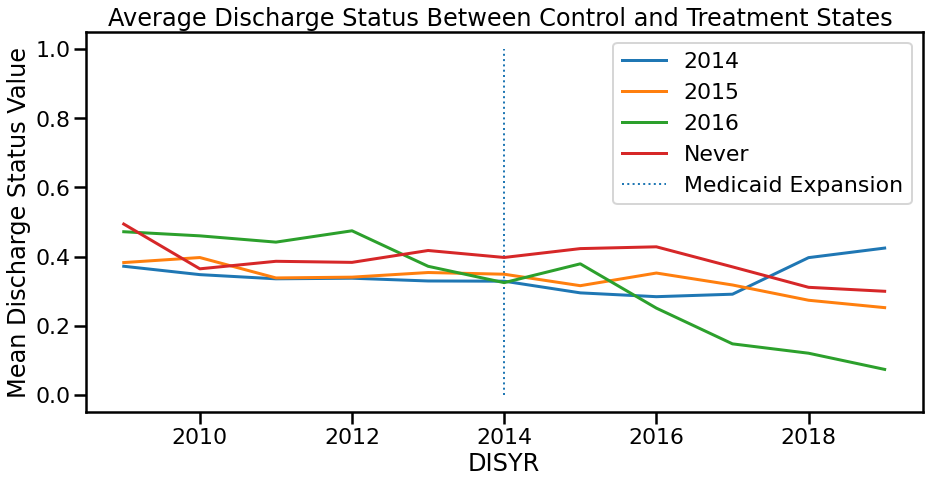

In [275]:
ax = plt.subplot(1, 1, 1)

(outp_7m_3
 .groupby(["DISYR","Imp_Year"])
 ["reason_coded"]
 .mean()
 .reset_index()
 .pivot("DISYR", "Imp_Year", "reason_coded")
 .plot(ax=ax, figsize=(15,7)))

plt.vlines(x=2014, ymin=0, ymax=1, linestyle=":", lw=2, label="Medicaid Expansion")
plt.ylabel("Mean Discharge Status Value")
plt.title("Average Discharge Status Between Control and Treatment States ")
plt.legend();  

The resulting graph showed no clear parallel trend among the states pre-intervention period and thus we cannot confidently say that a counterfactual scenario is modeled by the control group which is an essential aspect of the DiD estimation. Given that we are comparing states of various sizes and different ideologies/cultures in terms of how substance use disorder is treated, it makes intuitive sense that proving the Parallel Trend assumption would be challenging. While no immediate effect on average discharge status can be observed after 2014, a noticeable increase can be seen for the 2014 implementers around 2017 onwards while the opposite is true for the 2016 group where a dip can be observed after 2016.

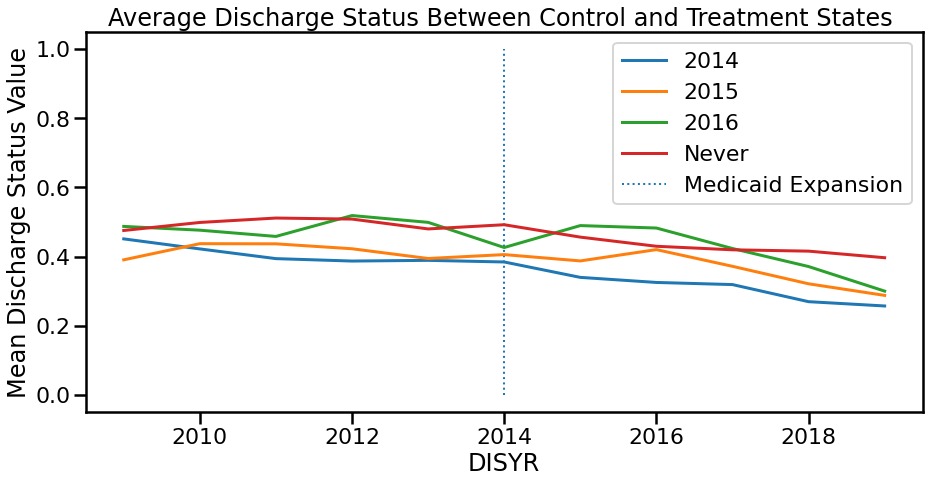

In [276]:
ax = plt.subplot(1, 1, 1)

(outp_ols
 .groupby(["DISYR","Imp_Year"])
 ["reason_coded"]
 .mean()
 .reset_index()
 .pivot("DISYR", "Imp_Year", "reason_coded")
 .plot(ax=ax, figsize=(15,7)))

plt.vlines(x=2014, ymin=0, ymax=1, linestyle=":", lw=2, label="Medicaid Expansion")
plt.ylabel("Mean Discharge Status Value")
plt.title("Average Discharge Status Between Control and Treatment States ")
plt.legend();  

In [103]:
dis_rate_imp= pd.read_csv('C:/Users/16502/Documents/Capstone/dis_rate_imp.csv')

In [104]:
dis_rate_imp

,Unnamed: 0,state_name,year,Imp_Year,discharge_rate,row
0,0,KANSAS,2009.0,Never,39.449059,0
1,1,KANSAS,2010.0,Never,41.569021,2
2,2,KANSAS,2011.0,Never,39.075317,4
3,3,KANSAS,2013.0,Never,38.443396,6
4,4,KANSAS,2015.0,Never,1.980198,8
...,...,...,...,...,...,...
468,468,WYOMING,2015.0,Never,51.130085,936
469,469,WYOMING,2016.0,Never,52.491874,938
470,470,WYOMING,2017.0,Never,53.297036,940
471,471,WYOMING,2018.0,Never,64.030752,942


Since the 1 million set would be used for the regressions, an analogous plot was generated using this dataset. The lines for each group were smoother compared to the 7m set which means that we did loose a lot of context by using the 1m set. More importantly, the significant increase and decrease in average discharge status for the 2014 and 2016 implementers respectively were not evident in the 1m set.
</p>
Overall, the Medicaid expansion might have been not as impactful to treatment ouctomes or if it did, it did so negatively based on the downward direction of the lines.

## Correlated Features

In [281]:
X = outp_7m_3[['AGE',
 'GENDER',
 'RACE',
 'ETHNIC',
 'EDUC',
 'EMPLOY',
 'DETNLF',
 'PREG',
 'VET',
 'LIVARAG',
 'PRIMINC',
 'SERVICES_D',
 'METHUSE',
 'DAYWAIT',
 'REASON',
 'LOS',
 'PSOURCE',
 'NOPRIOR',
 'SUB1',
 'DSMCRIT',
 'PSYPROB',
 'PRIMPAY']]

VIF score is a statistical measure of collinearity between variables. Scores that are >5 but less than 10 are mildly correlated with other variables while a score > 10 means extreme correlation. Based on our results, AGE and GENDER are mildly correlated and we use this information in assessing the preliminary results of the models below. Also, given that GENDER and PREG (being pregant) are highly correlated with one another, the PREG variable was not considered in their analysis. 

In [282]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature        VIF
0          AGE   1.046518
1       GENDER   3.455979
2         RACE   1.107142
3       ETHNIC   1.134885
4         EDUC   1.967650
5       EMPLOY   2.347215
6       DETNLF   1.376914
7         PREG   3.423346
8          VET   1.407760
9      LIVARAG   2.171796
10     PRIMINC   1.332236
11  SERVICES_D  59.098957
12     METHUSE   1.068063
13     DAYWAIT   1.019096
14      REASON   1.084583
15         LOS   1.119208
16     PSOURCE   1.296011
17     NOPRIOR   1.167744
18        SUB1   1.246597
19     DSMCRIT   1.139736
20     PSYPROB   1.147416
21     PRIMPAY   1.326616


In [283]:
corr = outp_7m_3.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\16502\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning:

All-NaN slice encountered

C:\Users\16502\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning:

All-NaN slice encountered



,Unnamed: 0,Unnamed: 0.1,CASEID,STFIPS,DISYR,AGE,GENDER,RACE,ETHNIC,EDUC,EMPLOY,DETNLF,PREG,VET,LIVARAG,PRIMINC,SERVICES_D,METHUSE,DAYWAIT,REASON,LOS,PSOURCE,NOPRIOR,SUB1,DSMCRIT,PSYPROB,PRIMPAY,Treat,Post,reason_coded,DID
Unnamed: 0,1.000000,1.000000,0.995522,-0.035420,0.995244,-0.070294,0.038648,-0.178055,-0.208576,-0.157205,-0.191976,-0.043944,0.033373,-0.046727,-0.204504,-0.244708,nan,-0.102560,-0.109363,0.017731,-0.129170,-0.177607,-0.095220,-0.006014,0.194184,0.077706,0.072951,0.655347,0.862405,-0.014670,0.655347
Unnamed: 0.1,1.000000,1.000000,0.995522,-0.035420,0.995244,-0.070294,0.038648,-0.178055,-0.208576,-0.157205,-0.191976,-0.043944,0.033373,-0.046727,-0.204504,-0.244708,nan,-0.102560,-0.109363,0.017731,-0.129170,-0.177607,-0.095220,-0.006014,0.194184,0.077706,0.072951,0.655347,0.862405,-0.014670,0.655347
CASEID,0.995522,0.995522,1.000000,-0.064798,0.999890,-0.071268,0.041245,-0.192660,-0.218724,-0.177863,-0.209685,-0.045777,0.034712,-0.053163,-0.226286,-0.249123,nan,-0.095982,-0.107132,0.013315,-0.133257,-0.190020,-0.095251,-0.014989,0.189208,0.086704,0.080087,0.674399,0.874094,-0.007758,0.674399
STFIPS,-0.035420,-0.035420,-0.064798,1.000000,-0.058132,0.022522,-0.046528,-0.060191,0.116314,0.229353,0.140845,0.161645,-0.049050,0.032149,0.220438,0.287658,nan,0.020389,-0.068100,0.059386,-0.007802,0.152024,-0.013509,-0.026229,0.011989,-0.163466,0.072367,-0.209314,-0.045033,-0.044456,-0.209314
DISYR,0.995244,0.995244,0.999890,-0.058132,1.000000,-0.070980,0.041015,-0.193819,-0.217630,-0.175631,-0.207726,-0.043332,0.034103,-0.051445,-0.223369,-0.245623,nan,-0.096621,-0.107002,0.013541,-0.131884,-0.187926,-0.095084,-0.015517,0.189623,0.086486,0.080868,0.675066,0.874747,-0.008004,0.675066
AGE,-0.070294,-0.070294,-0.071268,0.022522,-0.070980,1.000000,-0.024729,-0.040208,0.036501,0.049546,-0.023568,0.035312,-0.019838,-0.010492,0.001793,-0.005143,nan,-0.003590,-0.017080,0.001582,-0.014970,-0.103325,0.099541,-0.075262,-0.031960,0.010896,-0.052204,-0.047699,-0.079308,0.007726,-0.047699
GENDER,0.038648,0.038648,0.041245,-0.046528,0.041015,-0.024729,1.000000,0.013580,0.073628,0.039253,0.078222,0.040159,0.836715,0.027787,0.035148,-0.002998,nan,0.051025,0.000627,0.020502,-0.017987,-0.031133,0.057757,0.111037,0.023749,-0.021519,0.037284,0.028087,0.036097,-0.032979,0.028087
RACE,-0.178055,-0.178055,-0.192660,-0.060191,-0.193819,-0.040208,0.013580,1.000000,0.153350,0.147540,0.182445,0.009258,-0.022444,0.143635,0.183714,0.019457,nan,0.037277,0.008417,-0.005235,0.081243,0.116025,0.050279,0.105012,-0.173373,0.019405,-0.179202,-0.137194,-0.177097,-0.043946,-0.137194
ETHNIC,-0.208576,-0.208576,-0.218724,0.116314,-0.217630,0.036501,0.073628,0.153350,1.000000,0.265622,0.220470,0.026650,0.018399,0.146217,0.277880,0.108397,nan,0.057674,0.037590,0.010187,0.054098,0.159502,0.040252,0.096257,-0.031762,-0.008291,-0.066822,-0.210022,-0.203572,-0.043098,-0.210022
EDUC,-0.157205,-0.157205,-0.177863,0.229353,-0.175631,0.049546,0.039253,0.147540,0.265622,1.000000,0.542035,0.016553,0.002401,0.384835,0.642931,0.146049,nan,0.008658,0.038858,0.096935,0.122230,0.314471,0.087641,0.272920,-0.139354,-0.014681,-0.146815,-0.139578,-0.126411,-0.140973,-0.139578


# Econometric Models

While we know that the Parallel Trend Assumption was not fulfilled in this case, it might still be interesting to compare the DID model with the FE models. Also, a comparative model for each type was also generated without the “RACE” variable to check for robustness. 

**How to Analyze the Results:** Again, the F Statistic Score was assessed  in addition to the respective p values of each coefficient.  The ideal value for F Statistic >10 while we want small p values.  

## Differences-in-Differences Approach 

In [284]:
dd_v= ols(formula='reason_coded ~  Treat + Post + DID + AGE + GEN + VET + RACE +EMPLOY + EDUC + homeless + MAT + PRIOR + SUB1 + PRIMPAY+ PSY', data=outp_ols).fit()
#dd_v.summary()

In [285]:
dd_rt= ols(formula='reason_coded ~  Treat + Post + DID + AGE + GEN + VET +EMPLOY + EDUC + homeless + MAT + PRIOR + SUB1 + PRIMPAY+ PSY', data=outp_ols).fit()
#dd_rt.summary()

In [286]:
stargazer_dd = Stargazer([dd_v, dd_rt])
#stargazer_dd.render_html()
stargazer_dd.title('<b>Outpatient Models<b>')
stargazer_dd.custom_columns(['Outpatient 1M Set', '1M set no RACE'], [1, 1])
stargazer_dd

**Analysis of DiD Models:** <p> 
In comparing the F Statistic scores between the 2 DiD Models, the model without the "RACE" variable had a marginally larger F Statistic score but both models had F Stats > 10.  The p values of the coefficients in both models were also statistically significant which means that there is less than 1% chance that these variables are not significant. <p> 
    
The **DID** variable had a coefficient of -0.037*** which means that being an adopter of medicaid expansion translated to -.037 less points towards a successful treatment completion. Given that intercept is 0.574*** the DID's effect is very small but negative and statistically significant nonetheless. Despite of this, we were unable to conclude anything about the differential effect of the medicaid expansion to treatment outcomes since the Parallel Trend assumption was not proven initially.<p> 
    
In terms of the other covariates, age, education, being a man, race and being a veteran were positively correlated with treatment completions. However,  being employed, participating in Medication Assisted Therapy, payment type used, having prior treatment episodes, having psychological comorbidities, being homeless and the type of substance being abused were all negatively correlated with treatment completions.

## Two-Way Fixed Effects Approach 

Similar to the DID approach, we have 2 models using the Two-way Fixed Effects. Again, a comparative model was generated without the 'RACE' variable.

In [290]:
FE_v = ols(formula='reason_coded ~  Treat +C(DISYR) + C(STFIPS) + AGE + GEN + VET + RACE +EMPLOY + EDUC + homeless + MAT + PRIOR + SUB1 + PRIMPAY+ PSY', data = outp_ols).fit()
#FE_v.summary()

In [291]:
FE_rt = ols(formula='reason_coded ~  Treat +C(DISYR) + C(STFIPS) + AGE + GEN + VET +EMPLOY + EDUC + homeless + MAT + PRIOR + SUB1 + PRIMPAY+ PSY', data = outp_ols).fit()
#FE_rt.summary()

In [292]:
stargazer_mods = Stargazer([FE_v,FE_rt])
#stargazer_dd.render_html()
stargazer_mods.title('<b>Outpatient Models<b>')
stargazer_mods.custom_columns(['FE Model', 'FE Model no Race'], [1, 1])
stargazer_mods

**Analysis of FE Models:** <p> 
In comparing the F Statistic scores between the 2 FE Models, the model without the "RACE" variable had a marginally larger F Statistic score but both models again had F stats that were > 10. The p values of the coefficients in both models were also statistically significant which means that there is less than 1% chance that these variables are not significant. <p> 
    
The **Treat** variable had a coefficient of 0.014*** which means that being an adopter of medicaid expansion translated to  **.014 more points towards a successful treatment completion**. This is in contrast to the DiD Model that estimated a negative and partially larger coefficient compared to the FE Models. <p> 
    
Furthermore, while both models had positive intercepts, the FE models had a coefficient of 0.468***	 which was smaller than the  DID's estimated effect.<p> 
    
In terms of the other covariates, age, education, being a man, race and being a veteran were positively correlated with treatment completions. However,  being employed, participating in Medication Assisted Therapy, payment type used, having prior treatment episodes, having psychological comorbidities, being homeless and the type of substance being abused were all negatively correlated with treatment completions.Still, the MAT coefficient had the largest degree of effect at -0.220***which was similar to the DiD's estimation. 

# Analysis 

Based on the model specifications of FE models in regards to panel data like the TEDs-D dataset, it might be possible that the FE model is the more accurate model of the two. However, in plotting the mean discharge rates across the years based on the implementation type, we know that the overall trend for the 2014 implementers was downward sloping which is in contrast to the FE estimator for the FE model. 
<p> 
To further analyze this discrepancy, an alternative  implementation of the Two-way Fixed Effects model was used. Specifically, the standard errors were clustered. By not clustering the standard errors for panel data, the resulting model might be prone to higher estimates for t-statistics , lower p values and narrow confidence intervals. Hence, the very small p values for the DiD and Treat coefficients might be due to the unclustered standard errors. 

##### Alternative Implementation of FE Model

In [293]:
w1=outp_ols.set_index(["STFIPS", "DISYR"])
FE = PanelOLS(w1.reason_coded, w1[['Treat', 'AGE', 'GEN', 'VET', 'RACE', 'EMPLOY', 'EDUC', 'homeless', 'MAT', 'PRIOR', 'SUB1', 'PRIMPAY', 'PSY']],
              entity_effects = True,
              time_effects=True
              )

In [306]:
# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             cluster_time=True
             )

display(result.summary)

Dep. Variable:,reason_coded,R-squared:,0.0595
Estimator:,PanelOLS,R-squared (Between):,-0.8645
No. Observations:,1832446,R-squared (Within):,0.0623
Date:,"Fri, May 13 2022",R-squared (Overall):,-0.2994
Time:,18:47:09,Log-likelihood,-1.136e+06
Cov. Estimator:,Clustered,,
,,F-statistic:,8914.2
Entities:,31,P-value,0.0000
Avg Obs:,5.911e+04,Distribution:,"F(13,1832392)"
Min Obs:,19.000,,
Max Obs:,3.141e+05,F-statistic (robust):,132.93


The coefficients of the new FE model have the same values as the previous FE Models and only the p values changed for the coefficients. TREAT and PRIMPAY were not significant while GEN (or being a man ) was only significant at 95% confidence level. Furthemore, the variable RACE was only significant at 90% CI. The rest of the coefficients remained significant at 99% CI. 

In [313]:
dd_params = pd.read_html(dd_v.summary().tables[1].as_html(),header=0,index_col=0)[0]

In [332]:
dd_params.reset_index()

,index,coef,std err,t,P>|t|,[0.025,0.975]
0,Intercept,0.5743,0.002,257.662,0.0,0.570,0.579
1,Treat,-0.0366,0.001,-63.974,0.0,-0.038,-0.036
2,Post,0.0100,0.001,8.668,0.0,0.008,0.012
3,DID,-0.0366,0.001,-63.974,0.0,-0.038,-0.036
4,AGE,0.0025,0.000,17.063,0.0,0.002,0.003
5,GEN,0.0393,0.001,53.453,0.0,0.038,0.041
6,VET,0.0492,0.002,23.506,0.0,0.045,0.053
7,RACE,0.0029,0.000,20.778,0.0,0.003,0.003
8,EMPLOY,-0.0398,0.000,-125.945,0.0,-0.040,-0.039
9,EDUC,0.0236,0.000,60.803,0.0,0.023,0.024


In [380]:
dd_params = dd_params.rename(columns={'index': 'var_name','std err': 'std_err', 'P>|t|': 'p_val' })

In [381]:
dd_coef = dd_params.iloc[:, 0:1]

In [436]:
fe_params= fe_params.rename(columns={'index': 'var_name','std err': 'std_err', 'P>|t|': 'p_val' })

In [437]:
fe_params.reset_index()

,index,coef,std_err,t,p_val,[0.025,0.975]
0,Intercept,0.4679,0.009,53.631,0.000,0.451,0.485
1,C(DISYR)[T.2010.0],0.0076,0.002,4.718,0.000,0.004,0.011
2,C(DISYR)[T.2011.0],-0.0014,0.002,-0.844,0.399,-0.005,0.002
3,C(DISYR)[T.2012.0],-0.0148,0.002,-8.714,0.000,-0.018,-0.011
4,C(DISYR)[T.2013.0],-0.0193,0.002,-11.543,0.000,-0.023,-0.016
5,C(DISYR)[T.2014.0],-0.0255,0.002,-12.441,0.000,-0.030,-0.022
6,C(DISYR)[T.2015.0],-0.0401,0.002,-18.935,0.000,-0.044,-0.036
7,C(DISYR)[T.2016.0],-0.0470,0.002,-22.255,0.000,-0.051,-0.043
8,C(DISYR)[T.2017.0],-0.0463,0.002,-21.851,0.000,-0.050,-0.042
9,C(DISYR)[T.2018.0],-0.0697,0.002,-33.023,0.000,-0.074,-0.066


In [438]:
fe_params = fe_params.drop(fe_params.index[range(41)])

In [439]:
fe_params= fe_params.reset_index()

In [440]:
fe_params = fe_params.rename(columns={'index': 'var_name','std err': 'std_err', 'P>|t|': 'p_val' })

In [441]:
fe_params

,var_name,coef,std_err,t,p_val,[0.025,0.975]
0,Treat,0.0137,0.002,8.237,0.0,0.010,0.017
1,AGE,0.0051,0.000,35.705,0.0,0.005,0.005
2,GEN,0.0167,0.001,23.126,0.0,0.015,0.018
3,VET,0.0366,0.002,17.930,0.0,0.033,0.041
4,RACE,0.0019,0.000,13.299,0.0,0.002,0.002
5,EMPLOY,-0.0311,0.000,-99.522,0.0,-0.032,-0.031
6,EDUC,0.0145,0.000,38.145,0.0,0.014,0.015
7,homeless,-0.0795,0.001,-55.931,0.0,-0.082,-0.077
8,MAT,-0.2203,0.001,-184.623,0.0,-0.223,-0.218
9,PRIOR,-0.0464,0.001,-66.660,0.0,-0.048,-0.045


In [444]:
fe_coef = fe_params.iloc[:, 0:2]

In [408]:
panel_ols_params= pd.read_html(result.summary.tables[1].as_html(),header=0,index_col=0)[0]

In [409]:
panel_ols_params=panel_ols_params.reset_index()

In [410]:
panel_ols_params = panel_ols_params.rename(columns={'index': 'var_name','Std. Err.': 'std_err', 'P-value': 'p_val' })

In [411]:
panel_ols_params

,var_name,Parameter,std_err,T-stat,p_val,Lower CI,Upper CI
0,Treat,0.0137,0.0243,0.5628,0.5736,-0.034000,0.0613
1,AGE,0.0051,0.0017,3.0297,0.0024,0.001800,0.0084
2,GEN,0.0167,0.0081,2.0694,0.0385,0.000900,0.0325
3,VET,0.0366,0.0069,5.2618,0.0000,0.022900,0.0502
4,RACE,0.0019,0.0010,1.8789,0.0603,-0.000084,0.0040
5,EMPLOY,-0.0311,0.0026,-11.9870,0.0000,-0.036200,-0.0261
6,EDUC,0.0145,0.0053,2.7175,0.0066,0.004000,0.0249
7,homeless,-0.0795,0.0172,-4.6343,0.0000,-0.113200,-0.0459
8,MAT,-0.2203,0.0528,-4.1709,0.0000,-0.323900,-0.1168
9,PRIOR,-0.0464,0.0116,-4.0067,0.0001,-0.069100,-0.0237


####  Coefficients 

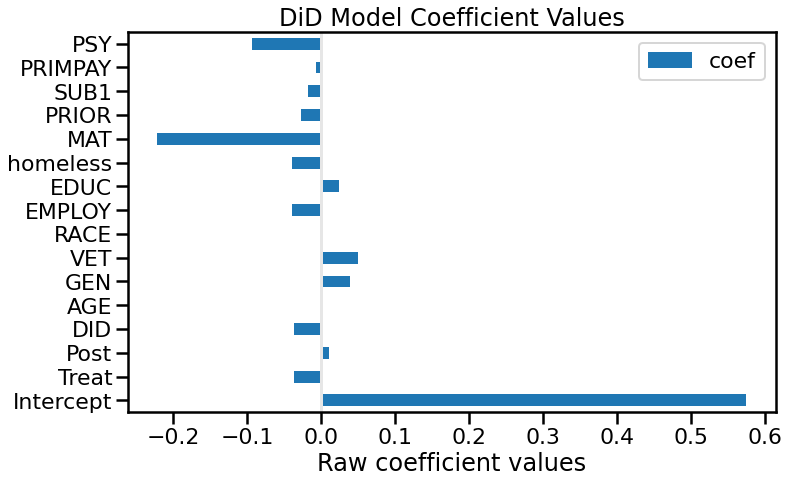

In [432]:
dd_coef.plot.barh(figsize=(15, 7))
plt.title("DiD Model Coefficient Values")
plt.axvline(x=0, color=".9")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [447]:
fe_coef

,var_name,coef
0,Treat,0.0137
1,AGE,0.0051
2,GEN,0.0167
3,VET,0.0366
4,RACE,0.0019
5,EMPLOY,-0.0311
6,EDUC,0.0145
7,homeless,-0.0795
8,MAT,-0.2203
9,PRIOR,-0.0464


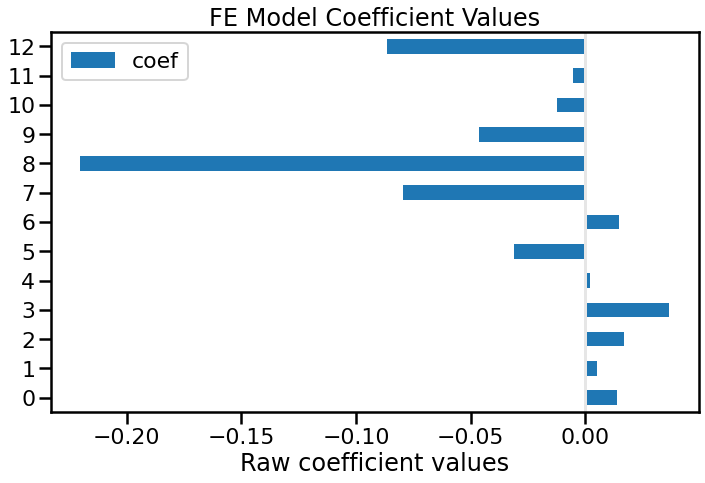

In [446]:
fe_coef.plot.barh(figsize=(15, 7))
plt.title("FE Model Coefficient Values")
plt.axvline(x=0, color=".9")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

# Discussion  

Overall, the positive direction of the ‘Treat’ variable might be due to the unclustered standard errors. In clustering the errors, the estimator remained  positive but the p value indicated that it was not statistically significant and therefore, Medicaid expansion did not have a significant effect on treatment completions. This is more intuitive than our previous findings from the non-clustered standard error results of the initial FE models given what we know from the plots for the Parallel Trend Assumption. 
<p>
Also given that we mainly analyzed the FE models, the results are only generalizable to the states included in the 1m set which included outlier states like New York and California. Hence, in approaching this inquiry again, other sampling methods and econometric models should be considered to minimize the loss of data from significant states and to properly account for all factors that play. 


# Implication 

While the expansion did not have any effect on treatment completions, we did observe that MAT participation was significantly and negatively correlated with treatment completions across all the models. Given the range of the intercepts, the -.22 estimator for MAT is pretty large as well. This is an interesting observation given that MAT is touted as a modality that increases treatment retention  and thus perhaps conducive to successful treatment completions. 
<p>
While this project was not able to illuminate the full extent of how medicaid expansion truly affected treatment completions, we did find some indication that states might benefit more from MAT through continuous evaluation of its costs and potential benfits. 
